# Empty project notebook

In [120]:
# Import python packages
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt


# Check version numbers
print(f'numpy: {np.version.version}')
print(f'pandas: {pd.__version__}')
print(f'scipy: {sp.__version__}')
print(f'scikit-learn: {sk.__version__}')
print(f'seaborn: {sns.__version__}')



numpy: 2.2.3
pandas: 2.2.3
scipy: 1.15.2
scikit-learn: 1.6.1
seaborn: 0.13.2


In [121]:
import os
import pandas as pd

# Define your folder path
folder_path = os.path.expanduser("~/Desktop/Coding Stuff/PodcastPred")

# File names 
file1 = os.path.join(folder_path, "train.csv")  
file2 = os.path.join(folder_path, "test.csv")  

# Read the CSV files into DataFrames
df_train = pd.read_csv(file1)
df_test = pd.read_csv(file2)

# Check to make sure they loaded correctly
print(df_train.head)
print(df_test.head)

<bound method NDFrame.head of             id      Podcast_Name Episode_Title  Episode_Length_minutes  \
0            0   Mystery Matters    Episode 98                     NaN   
1            1     Joke Junction    Episode 26                  119.80   
2            2    Study Sessions    Episode 16                   73.90   
3            3    Digital Digest    Episode 45                   67.17   
4            4       Mind & Body    Episode 86                  110.51   
...        ...               ...           ...                     ...   
749995  749995      Learning Lab    Episode 25                   75.66   
749996  749996   Business Briefs    Episode 21                   75.75   
749997  749997  Lifestyle Lounge    Episode 51                   30.98   
749998  749998       Style Guide    Episode 47                  108.98   
749999  749999    Sports Central    Episode 99                   24.10   

             Genre  Host_Popularity_percentage Publication_Day  \
0       True Cr

In [122]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [123]:
df_cat = df_train[['Podcast_Name', 'Episode_Title', 'Genre', 'Episode_Sentiment']]
df_cat.info

<bound method DataFrame.info of             Podcast_Name Episode_Title       Genre Episode_Sentiment
0        Mystery Matters    Episode 98  True Crime          Positive
1          Joke Junction    Episode 26      Comedy          Negative
2         Study Sessions    Episode 16   Education          Negative
3         Digital Digest    Episode 45  Technology          Positive
4            Mind & Body    Episode 86      Health           Neutral
...                  ...           ...         ...               ...
749995      Learning Lab    Episode 25   Education          Negative
749996   Business Briefs    Episode 21    Business           Neutral
749997  Lifestyle Lounge    Episode 51   Lifestyle          Negative
749998       Style Guide    Episode 47   Lifestyle          Negative
749999    Sports Central    Episode 99      Sports           Neutral

[750000 rows x 4 columns]>

In [124]:
print(df_train['Genre'].value_counts())
print(df_train['Episode_Sentiment'].value_counts())

Genre
Sports        87606
Technology    86256
True Crime    85059
Lifestyle     82461
Comedy        81453
Business      80521
Health        71416
News          63385
Music         62743
Education     49100
Name: count, dtype: int64
Episode_Sentiment
Neutral     251291
Negative    250116
Positive    248593
Name: count, dtype: int64


In [125]:
#Let's turn Episode_Sentiment into a binary variable
df = df_train.copy()
df['Episode_Sentiment'] = df_train['Episode_Sentiment'].map({'Positive': 1, 'Negative': -1, 'Neutral': 0})
df = pd.get_dummies(df_train, columns=['Genre'], drop_first=True)

# Convert only the new Genre columns to int
genre_cols = [col for col in df.columns if col.startswith('Genre_')]
df[genre_cols] = df[genre_cols].astype(int)
df.head()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Genre_Comedy,Genre_Education,Genre_Health,Genre_Lifestyle,Genre_Music,Genre_News,Genre_Sports,Genre_Technology,Genre_True Crime
0,0,Mystery Matters,Episode 98,NaN,74.81,Thursday,Night,NaN,0.0,Positive,31.41998,0,0,0,0,0,0,0,0,1
1,1,Joke Junction,Episode 26,119.80,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241,1,0,0,0,0,0,0,0,0
2,2,Study Sessions,Episode 16,73.90,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531,0,1,0,0,0,0,0,0,0
3,3,Digital Digest,Episode 45,67.17,57.22,Monday,Morning,78.70,2.0,Positive,46.27824,0,0,0,0,0,0,0,1,0
4,4,Mind & Body,Episode 86,110.51,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031,0,0,1,0,0,0,0,0,0


In [126]:
df['Episode_Sentiment'] =df['Episode_Sentiment'].map({'Positive': 1, 'Negative': -1, 'Neutral': 0})

In [127]:
df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Genre_Comedy,Genre_Education,Genre_Health,Genre_Lifestyle,Genre_Music,Genre_News,Genre_Sports,Genre_Technology,Genre_True Crime
0,0,Mystery Matters,Episode 98,NaN,74.81,Thursday,Night,NaN,0.0,1,31.41998,0,0,0,0,0,0,0,0,1
1,1,Joke Junction,Episode 26,119.80,66.95,Saturday,Afternoon,75.95,2.0,-1,88.01241,1,0,0,0,0,0,0,0,0
2,2,Study Sessions,Episode 16,73.90,69.97,Tuesday,Evening,8.97,0.0,-1,44.92531,0,1,0,0,0,0,0,0,0
3,3,Digital Digest,Episode 45,67.17,57.22,Monday,Morning,78.70,2.0,1,46.27824,0,0,0,0,0,0,0,1,0
4,4,Mind & Body,Episode 86,110.51,80.07,Monday,Afternoon,58.68,3.0,0,75.61031,0,0,1,0,0,0,0,0,0


In [128]:
import numpy as np

# Assume you have a column like this: df['DayOfWeek'] = ['Monday', 'Tuesday', ..., 'Sunday']
# First map to 0-6 (or 1-7, doesn't matter as long as it's consistent)
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
               'Friday': 4, 'Saturday': 5, 'Sunday': 6}
df['Publication_Day'] = df['Publication_Day'].map(day_mapping)

# Now apply sine and cosine transforms
df['day_sin'] = np.sin(2 * np.pi * df['Publication_Day'] / 7)
df['day_cos'] = np.cos(2 * np.pi * df['Publication_Day'] / 7)

In [129]:
df['Publication_Time'].value_counts()

Publication_Time
Night        196849
Evening      195778
Afternoon    179460
Morning      177913
Name: count, dtype: int64

In [130]:


# Step 1: Clean and standardize the text
df['Publication_Time'] = df['Publication_Time'].str.strip().str.lower()

# Step 2: Map to integers (morning=0, ..., night=3)
time_mapping = {'morning': 0, 'afternoon': 1, 'evening': 2, 'night': 3}
df['time_num'] = df['Publication_Time'].map(time_mapping)

# Step 3: Apply cyclical encoding
df['time_sin'] = np.sin(2 * np.pi * df['time_num'] / 4)
df['time_cos'] = np.cos(2 * np.pi * df['time_num'] / 4)

# Optional: drop the numeric helper column
df.drop(columns=['time_num'], inplace=True)


print(df['Publication_Time'].value_counts())

Publication_Time
night        196849
evening      195778
afternoon    179460
morning      177913
Name: count, dtype: int64


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Host_Popularity_percentage   750000 non-null  float64
 5   Publication_Day              750000 non-null  int64  
 6   Publication_Time             750000 non-null  object 
 7   Guest_Popularity_percentage  603970 non-null  float64
 8   Number_of_Ads                749999 non-null  float64
 9   Episode_Sentiment            750000 non-null  int64  
 10  Listening_Time_minutes       750000 non-null  float64
 11  Genre_Comedy                 750000 non-null  int64  
 12  Genre_Education              750000 non-null  int64  
 13 

In [132]:
df.head()
df = df.drop(columns=['Publication_Day', 'Publication_Time'])
df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Genre_Comedy,...,Genre_Lifestyle,Genre_Music,Genre_News,Genre_Sports,Genre_Technology,Genre_True Crime,day_sin,day_cos,time_sin,time_cos
0,0,Mystery Matters,Episode 98,NaN,74.81,NaN,0.0,1,31.41998,0,...,0,0,0,0,0,1,0.433884,-0.900969,-1.000000e+00,-1.836970e-16
1,1,Joke Junction,Episode 26,119.80,66.95,75.95,2.0,-1,88.01241,1,...,0,0,0,0,0,0,-0.974928,-0.222521,1.000000e+00,6.123234e-17
2,2,Study Sessions,Episode 16,73.90,69.97,8.97,0.0,-1,44.92531,0,...,0,0,0,0,0,0,0.781831,0.623490,1.224647e-16,-1.000000e+00
3,3,Digital Digest,Episode 45,67.17,57.22,78.70,2.0,1,46.27824,0,...,0,0,0,0,1,0,0.000000,1.000000,0.000000e+00,1.000000e+00
4,4,Mind & Body,Episode 86,110.51,80.07,58.68,3.0,0,75.61031,0,...,0,0,0,0,0,0,0.000000,1.000000,1.000000e+00,6.123234e-17


In [133]:
df['Episode_Title'].value_counts()

Episode_Title
Episode 71    10515
Episode 62    10373
Episode 31    10292
Episode 61     9991
Episode 69     9864
              ...  
Episode 2      5134
Episode 25     5117
Episode 41     4965
Episode 37     4940
Episode 95     4838
Name: count, Length: 100, dtype: int64

In [134]:
df['Episode_Title'] = df['Episode_Title'].str.replace('Episode ', '', regex=False).astype(int)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  int64  
 3   Episode_Length_minutes       662907 non-null  float64
 4   Host_Popularity_percentage   750000 non-null  float64
 5   Guest_Popularity_percentage  603970 non-null  float64
 6   Number_of_Ads                749999 non-null  float64
 7   Episode_Sentiment            750000 non-null  int64  
 8   Listening_Time_minutes       750000 non-null  float64
 9   Genre_Comedy                 750000 non-null  int64  
 10  Genre_Education              750000 non-null  int64  
 11  Genre_Health                 750000 non-null  int64  
 12  Genre_Lifestyle              750000 non-null  int64  
 13 

In [136]:
df = df.drop(columns=['Podcast_Name'])
df.head()

,id,Episode_Title,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Genre_Comedy,Genre_Education,...,Genre_Lifestyle,Genre_Music,Genre_News,Genre_Sports,Genre_Technology,Genre_True Crime,day_sin,day_cos,time_sin,time_cos
0,0,98,NaN,74.81,NaN,0.0,1,31.41998,0,0,...,0,0,0,0,0,1,0.433884,-0.900969,-1.000000e+00,-1.836970e-16
1,1,26,119.80,66.95,75.95,2.0,-1,88.01241,1,0,...,0,0,0,0,0,0,-0.974928,-0.222521,1.000000e+00,6.123234e-17
2,2,16,73.90,69.97,8.97,0.0,-1,44.92531,0,1,...,0,0,0,0,0,0,0.781831,0.623490,1.224647e-16,-1.000000e+00
3,3,45,67.17,57.22,78.70,2.0,1,46.27824,0,0,...,0,0,0,0,1,0,0.000000,1.000000,0.000000e+00,1.000000e+00
4,4,86,110.51,80.07,58.68,3.0,0,75.61031,0,0,...,0,0,0,0,0,0,0.000000,1.000000,1.000000e+00,6.123234e-17


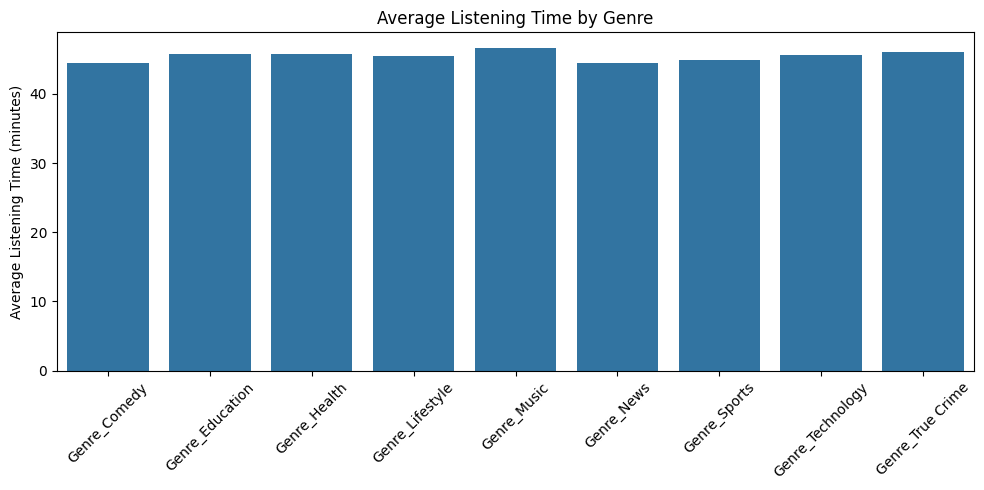

In [137]:
genre_cols = [col for col in df.columns if col.startswith('Genre_')]

# Mean listening time per genre
means = {genre: df[df[genre] == 1]['Listening_Time_minutes'].mean() for genre in genre_cols}

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=list(means.keys()), y=list(means.values()))
plt.xticks(rotation=45)
plt.ylabel('Average Listening Time (minutes)')
plt.title('Average Listening Time by Genre')
plt.tight_layout()
plt.show()

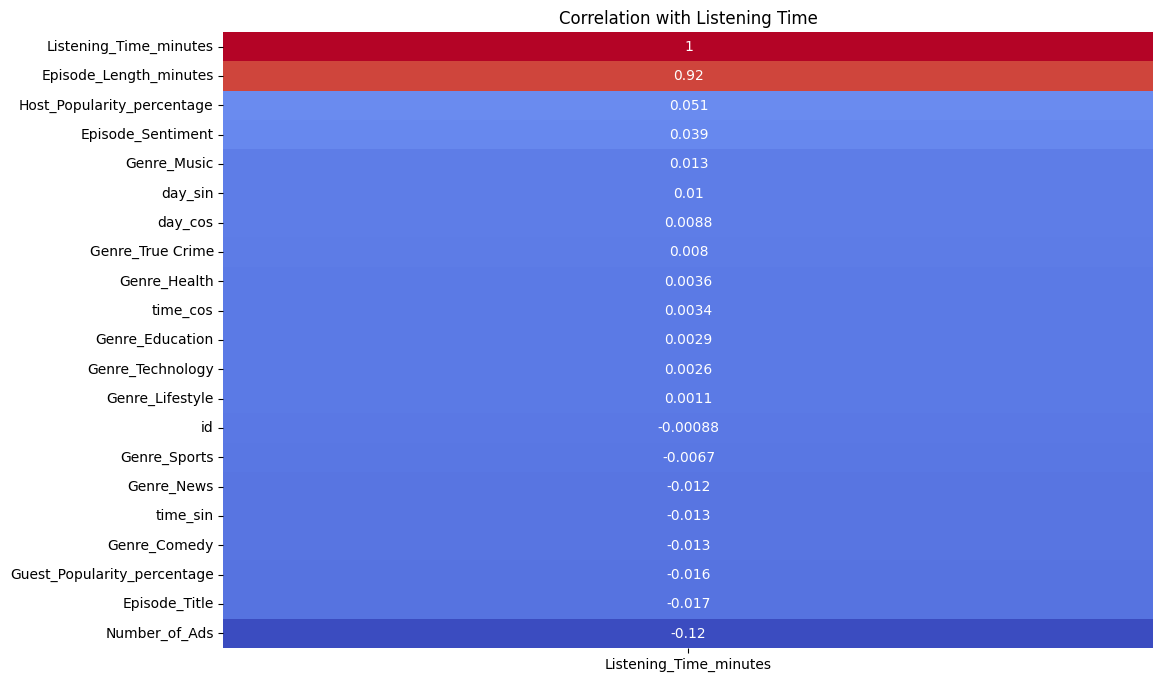

In [138]:
num_cols = df.select_dtypes(include='number').columns
corr = df[num_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr[['Listening_Time_minutes']].sort_values(by='Listening_Time_minutes', ascending=False), 
            annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation with Listening Time')
plt.show()

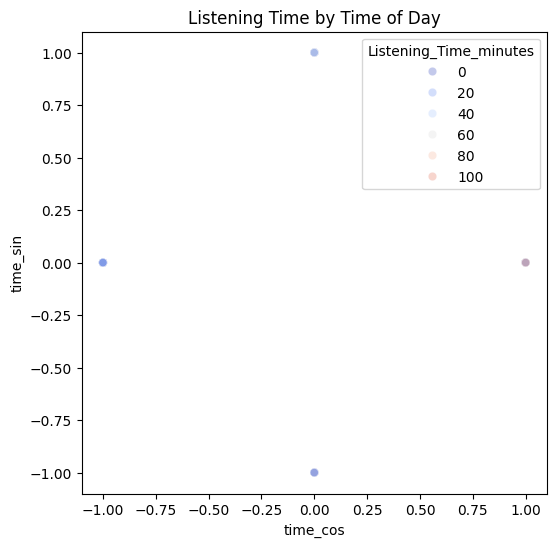

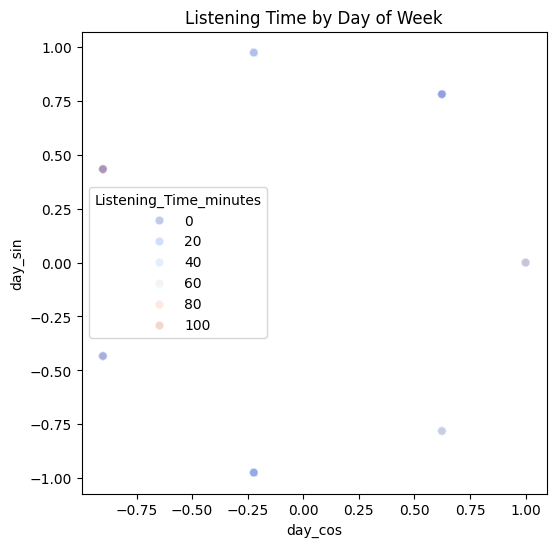

In [139]:
# Time of Day
plt.figure(figsize=(6, 6))
sns.scatterplot(x='time_cos', y='time_sin', hue='Listening_Time_minutes', data=df, alpha=0.3, palette='coolwarm')
plt.title('Listening Time by Time of Day')
plt.show()

# Day of Week
plt.figure(figsize=(6, 6))
sns.scatterplot(x='day_cos', y='day_sin', hue='Listening_Time_minutes', data=df, alpha=0.3, palette='coolwarm')
plt.title('Listening Time by Day of Week')
plt.show()

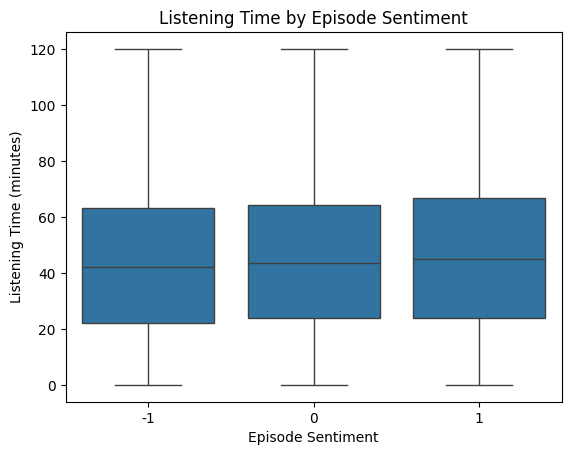

In [140]:
sns.boxplot(x='Episode_Sentiment', y='Listening_Time_minutes', data=df)
plt.title('Listening Time by Episode Sentiment')
plt.xlabel('Episode Sentiment')
plt.ylabel('Listening Time (minutes)')
plt.show()

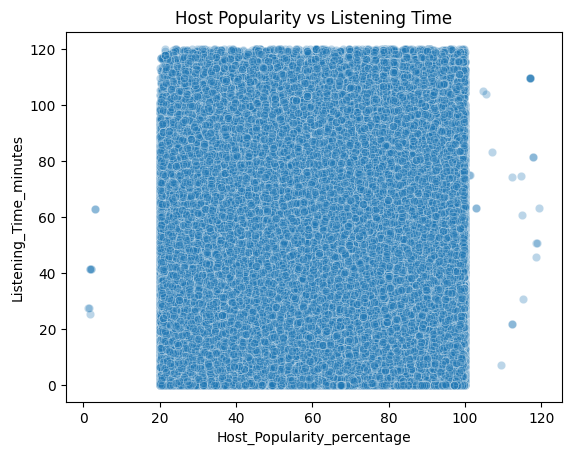

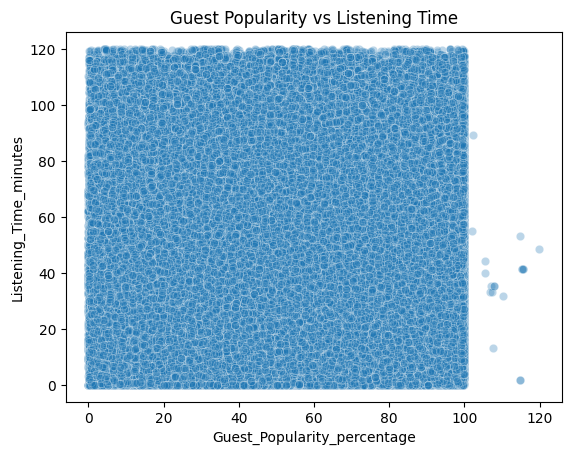

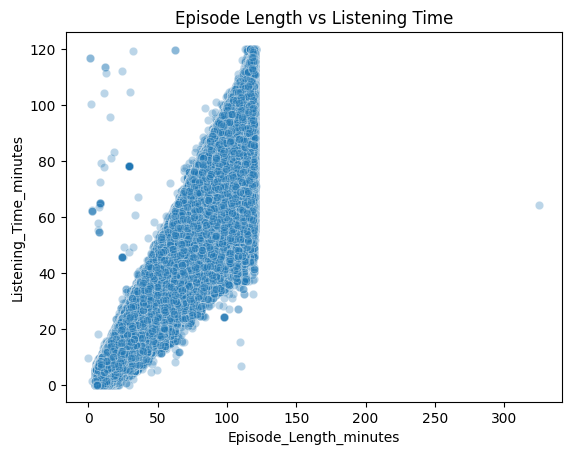

In [141]:
# Host Popularity
sns.scatterplot(x='Host_Popularity_percentage', y='Listening_Time_minutes', data=df, alpha=0.3)
plt.title('Host Popularity vs Listening Time')
plt.show()

# Guest Popularity
sns.scatterplot(x='Guest_Popularity_percentage', y='Listening_Time_minutes', data=df, alpha=0.3)
plt.title('Guest Popularity vs Listening Time')
plt.show()

# Episode Length
sns.scatterplot(x='Episode_Length_minutes', y='Listening_Time_minutes', data=df, alpha=0.3)
plt.title('Episode Length vs Listening Time')
plt.show()

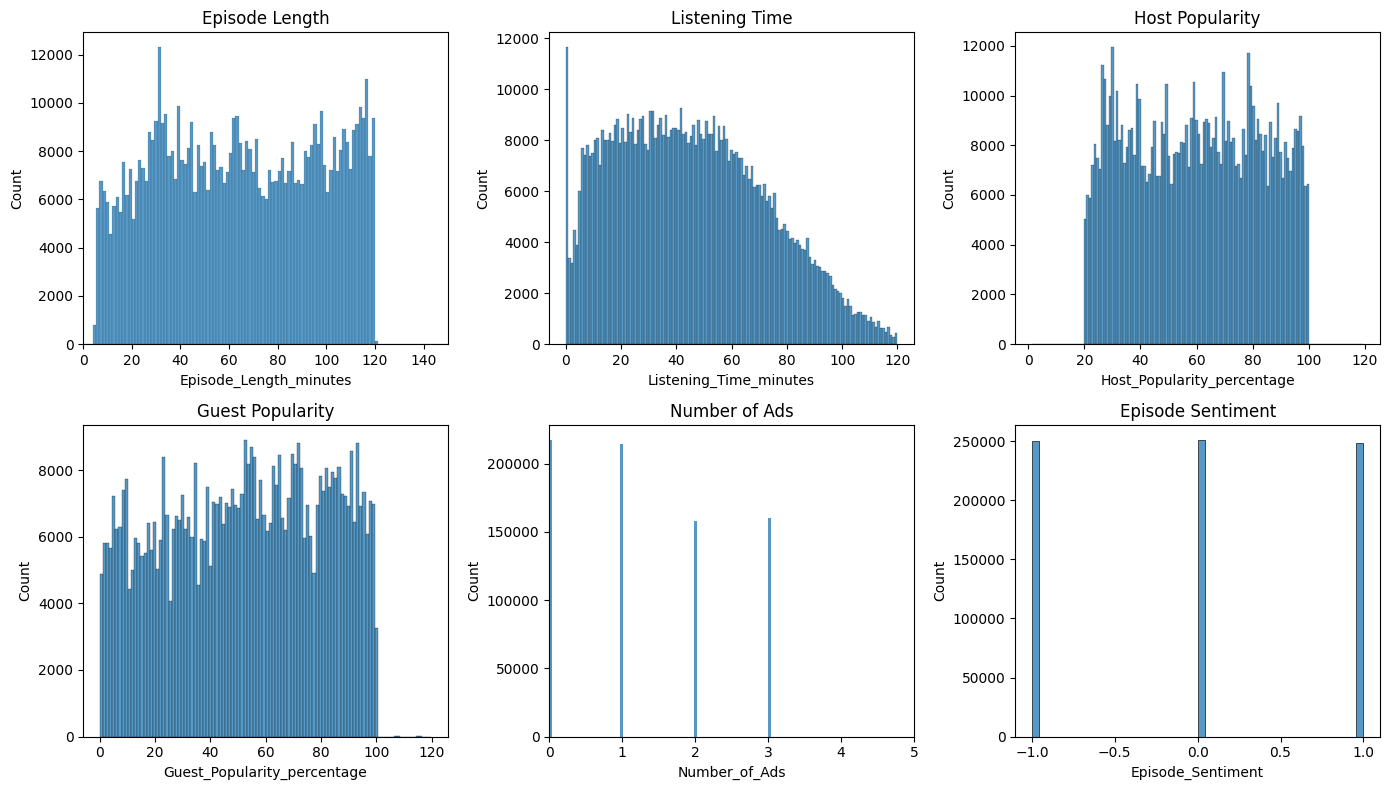

In [142]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Set up subplots
fig, axis = plt.subplots(2, 3, figsize=(14, 8))

# First row
sns.histplot(ax=axis[0, 0], data=df, x="Episode_Length_minutes")
axis[0, 0].set_title("Episode Length")
axis[0,0].set_xlim(0,150)

sns.histplot(ax=axis[0, 1], data=df, x="Listening_Time_minutes")
axis[0, 1].set_title("Listening Time")

sns.histplot(ax=axis[0, 2], data=df, x="Host_Popularity_percentage")
axis[0, 2].set_title("Host Popularity")

# Second row
sns.histplot(ax=axis[1, 0], data=df, x="Guest_Popularity_percentage")
axis[1, 0].set_title("Guest Popularity")

sns.histplot(ax=axis[1, 1], data=df, x="Number_of_Ads")
axis[1, 1].set_title("Number of Ads")
axis[1,1].set_xlim(0,5)

sns.histplot(ax=axis[1, 2], data=df, x="Episode_Sentiment")
axis[1, 2].set_title("Episode Sentiment")

# Adjust layout
plt.tight_layout()
plt.show()

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Episode_Title                750000 non-null  int64  
 2   Episode_Length_minutes       662907 non-null  float64
 3   Host_Popularity_percentage   750000 non-null  float64
 4   Guest_Popularity_percentage  603970 non-null  float64
 5   Number_of_Ads                749999 non-null  float64
 6   Episode_Sentiment            750000 non-null  int64  
 7   Listening_Time_minutes       750000 non-null  float64
 8   Genre_Comedy                 750000 non-null  int64  
 9   Genre_Education              750000 non-null  int64  
 10  Genre_Health                 750000 non-null  int64  
 11  Genre_Lifestyle              750000 non-null  int64  
 12  Genre_Music                  750000 non-null  int64  
 13 

In [144]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Identify columns to exclude from scaling
exclude_cols = [col for col in df.columns if 
                col.startswith('Genre_') or 
                col in ['id', 'Episode_Title', 'Podcast_Name', 'Listening_Time_minutes', 
                        'day_sin', 'day_cos', 'time_sin', 'time_cos']]

# Select numeric columns to scale
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
scale_cols = [col for col in numeric_cols if col not in exclude_cols]

# Standardize the appropriate features
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

In [145]:
df.head()

,id,Episode_Title,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Genre_Comedy,Genre_Education,...,Genre_Lifestyle,Genre_Music,Genre_News,Genre_Sports,Genre_Technology,Genre_True Crime,day_sin,day_cos,time_sin,time_cos
0,0,98,NaN,0.653611,NaN,-1.171766,1.228823,31.41998,0,0,...,0,0,0,0,0,1,0.433884,-0.900969,-1.000000e+00,-1.836970e-16
1,1,26,1.677160,0.309976,0.833481,0.565657,-1.223843,88.01241,1,0,...,0,0,0,0,0,0,-0.974928,-0.222521,1.000000e+00,6.123234e-17
2,2,16,0.284968,0.442009,-1.520724,-1.171766,-1.223843,44.92531,0,1,...,0,0,0,0,0,0,0.781831,0.623490,1.224647e-16,-1.000000e+00
3,3,45,0.080840,-0.115415,0.930138,0.565657,1.228823,46.27824,0,0,...,0,0,0,0,1,0,0.000000,1.000000,0.000000e+00,1.000000e+00
4,4,86,1.395385,0.883576,0.226477,1.434369,0.002490,75.61031,0,0,...,0,0,0,0,0,0,0.000000,1.000000,1.000000e+00,6.123234e-17


In [146]:
import joblib

# Save your trained scaler to disk
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [148]:
df = df[df['Episode_Length_minutes'] > 0]
df['Guest_Popularity_percentage'] = df['Guest_Popularity_percentage'].fillna(0)
df = df[df['Number_of_Ads'].notna()]

In [149]:
# Features
X = df.drop(columns=['id', 'Episode_Title', 'Listening_Time_minutes'])

# Target
y = df['Listening_Time_minutes']

In [150]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [151]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = model.predict(X)

# Manually compute RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 13.58
R² Score: 0.4808


In [152]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Define alphas to test (strength of regularization)
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Ridge Regression
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid={'alpha': alphas}, scoring='neg_root_mean_squared_error', cv=5)
ridge_cv.fit(X, y)

print("🔵 Best Ridge alpha:", ridge_cv.best_params_['alpha'])
print("🔵 Ridge RMSE (CV):", -ridge_cv.best_score_)

🔵 Best Ridge alpha: 10
🔵 Ridge RMSE (CV): 13.580234196677768


In [153]:
# Lasso Regression
lasso = Lasso(max_iter=10000)
lasso_cv = GridSearchCV(lasso, param_grid={'alpha': alphas}, scoring='neg_root_mean_squared_error', cv=5)
lasso_cv.fit(X, y)

print("🟣 Best Lasso alpha:", lasso_cv.best_params_['alpha'])
print("🟣 Lasso RMSE (CV):", -lasso_cv.best_score_)

🟣 Best Lasso alpha: 0.001
🟣 Lasso RMSE (CV): 13.580232275650985


In [154]:
from sklearn.linear_model import Ridge

best_ridge = Ridge(alpha=10)  # 👈 your best alpha here
best_ridge.fit(X, y)

y_pred_ridge = best_ridge.predict(X)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse_ridge = np.sqrt(mean_squared_error(y, y_pred_ridge))
r2_ridge = r2_score(y, y_pred_ridge)

print(f"🔵 Ridge RMSE: {rmse_ridge:.2f}")
print(f"🔵 Ridge R²: {r2_ridge:.4f}")

🔵 Ridge RMSE: 13.58
🔵 Ridge R²: 0.4808


In [155]:
from sklearn.linear_model import Lasso

best_lasso = Lasso(alpha=0.001, max_iter=10000)  # 👈 your best alpha here
best_lasso.fit(X, y)

y_pred_lasso = best_lasso.predict(X)

rmse_lasso = np.sqrt(mean_squared_error(y, y_pred_lasso))
r2_lasso = r2_score(y, y_pred_lasso)

print(f"🟣 Lasso RMSE: {rmse_lasso:.2f}")
print(f"🟣 Lasso R²: {r2_lasso:.4f}")

🟣 Lasso RMSE: 13.58
🟣 Lasso R²: 0.4808


In [156]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Models and their configs
models = {
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.001, max_iter=10000),
    'RandomForest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

# Store results
results = []

for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y, y_pred)
    
    results.append({
        'Model': name,
        'RMSE': round(rmse, 2),
        'R²': round(r2, 4)
    })

# Display
results_df = pd.DataFrame(results).sort_values(by='R²', ascending=False)
print(results_df)

          Model   RMSE      R²
2  RandomForest  13.02  0.5223
3       XGBoost  13.19  0.5099
0         Ridge  13.58  0.4808
1         Lasso  13.58  0.4808


In [157]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Base model
xgb = XGBRegressor(random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid search
grid = GridSearchCV(estimator=xgb, param_grid=param_grid,
                    scoring='neg_root_mean_squared_error',
                    cv=3, verbose=1, n_jobs=-1)

grid.fit(X, y)

# Best model
best_xgb = grid.best_estimator_
print("✅ Best Params:", grid.best_params_)
print("📉 Best RMSE (CV):", -grid.best_score_)
print("📈 Best R² (CV):", r2_score(y, best_xgb.predict(X)))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
✅ Best Params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
📉 Best RMSE (CV): 13.134699697371294
📈 Best R² (CV): 0.5486871037479504


In [158]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = best_xgb.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print(f"🔥 Tuned XGBoost RMSE: {rmse:.2f}")
print(f"🔥 Tuned XGBoost R²: {r2:.4f}")

🔥 Tuned XGBoost RMSE: 12.66
🔥 Tuned XGBoost R²: 0.5487


In [159]:
y_pred = best_xgb.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print(f"🔥 Tuned XGBoost RMSE: {rmse:.2f}")
print(f"🔥 Tuned XGBoost R²: {r2:.4f}")

🔥 Tuned XGBoost RMSE: 12.66
🔥 Tuned XGBoost R²: 0.5487


In [172]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3)
}

random_search = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X, y)
best_xgb = random_search.best_estimator_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [174]:
y_pred = best_xgb.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print(f"Tuned XGBoost RMSE: {rmse:.2f}")


Tuned XGBoost RMSE: 11.42


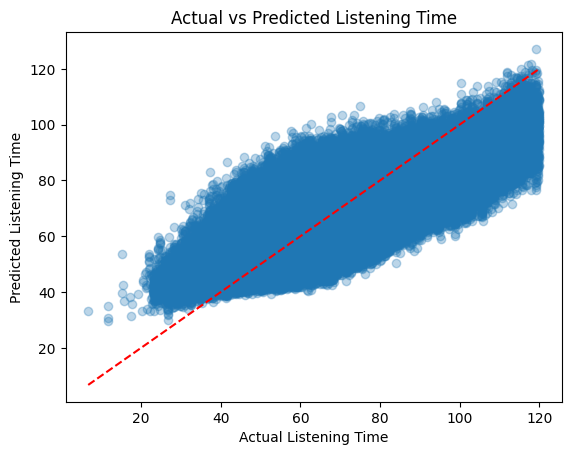

In [175]:
import matplotlib.pyplot as plt

plt.scatter(y, y_pred_actual, alpha=0.3)
plt.xlabel('Actual Listening Time')
plt.ylabel('Predicted Listening Time')
plt.title('Actual vs Predicted Listening Time')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # perfect prediction line
plt.show()

In [176]:
import joblib

joblib.dump(best_xgb, 'final_xgb_model.pkl')
joblib.dump(X.columns.tolist(), 'features_used.pkl')

['features_used.pkl']